In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [19]:
non_vehicle_paths = ["non-vehicles/Extras/*.png", "non-vehicles/GTI/*.png"]

vehicle_paths = ["vehicles/GTI_Far/*.png", "vehicles/GTI_Left/*.png", "vehicles/GTI_Right/*.png",
                    "vehicles/GTI_MiddleClose/*.png", "vehicles/KITTI_extracted/*.png"]

non_vehicle_filenames = []

vehicle_filenames = []

for path in non_vehicle_paths:
    non_vehicle_filenames += glob.glob(path)
    
for path in vehicle_paths:
    vehicle_filenames += glob.glob(path)
    
print(len(non_vehicle_filenames))
print(len(vehicle_filenames))

8968
8792


In [20]:
plt.rcParams['figure.figsize'] = (8, 10)

car_indices = np.random.choice(len(vehicle_filenames), 20)
notcar_indices = np.random.choice(len(non_vehicle_filenames), 20)

print(car_indices)
print(notcar_indices)

[1438 4899 5510  110 5424 7470 5957 6583 5538 8428 3871 1592 3052  610
 7887 1829 1210 1479  534 6701]
[6998 5764  156 7007 6934 1397 2353 2941  893  647 5381  282  176 3699
 3710 1606 6524 7655 2620 5411]


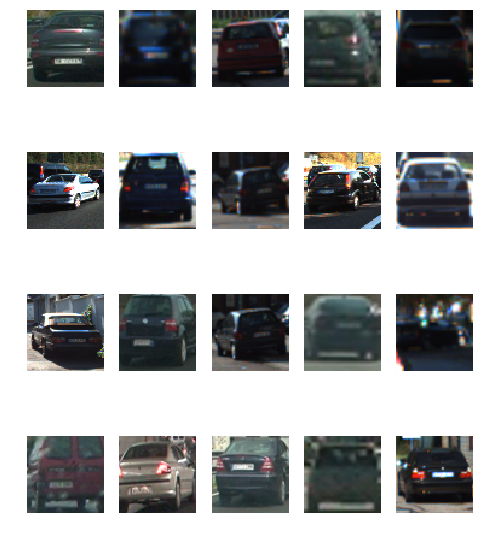

In [21]:
for i in range(5):
    for j in range(4):
        image = plt.imread(vehicle_filenames[car_indices[4*i + j]])
        plt.subplot(4,5,4*i + j + 1)
        plt.axis('off')
        plt.imshow(image)

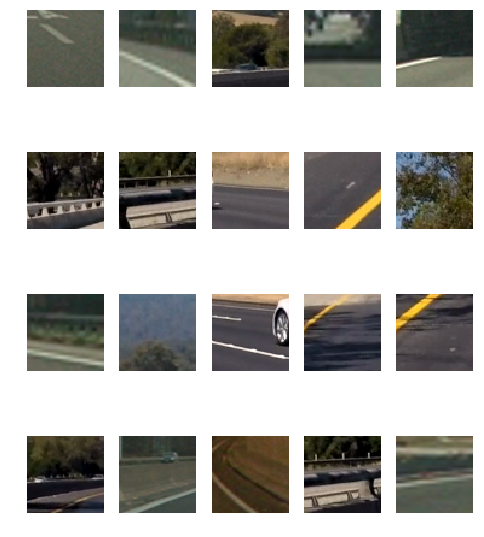

In [22]:
for i in range(5):
    for j in range(4):
        image = plt.imread(non_vehicle_filenames[notcar_indices[4*i + j]])
        plt.subplot(4,5,4*i + j + 1)
        plt.axis('off')
        plt.imshow(image)

Text(0.5,1,'B Histogram')

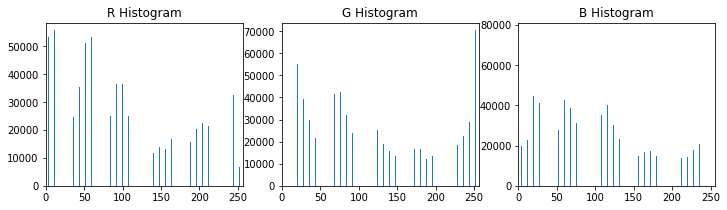

In [23]:
# Read in the image
image = plt.imread('cutout1.jpg')

# Take histograms in R, G, and B
rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))

# Generating bin centers
bin_edges = rhist[1]
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

# Plot a figure with all three bar charts
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers, rhist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bin_centers, ghist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('B Histogram')

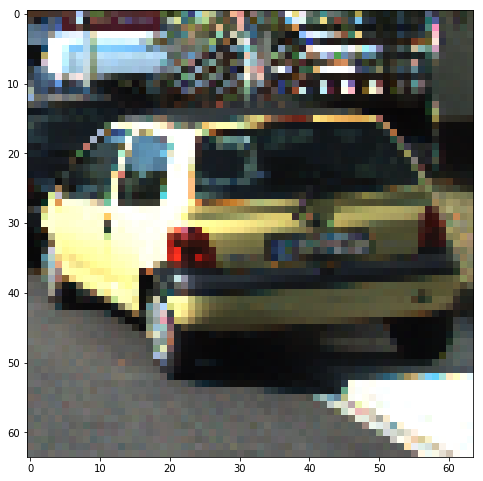

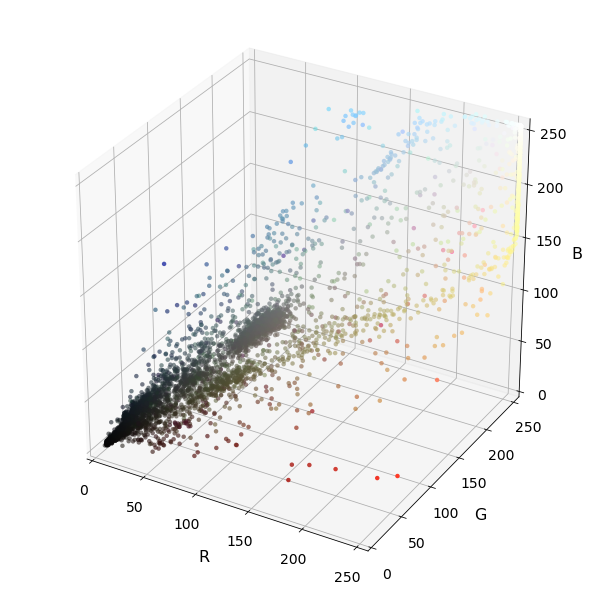

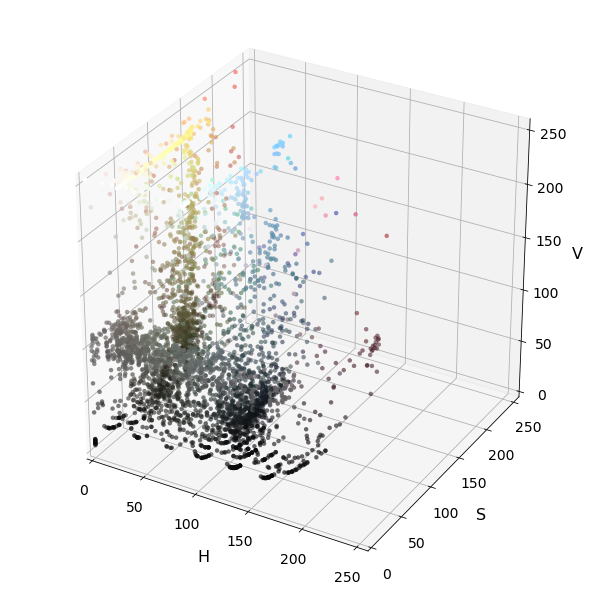

In [25]:
# Section 15: Explore Colorspaces
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=((0, 255), (0, 255), (0, 255))):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation


# Read a color image
img = cv2.imread("25.png")

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
plt.imshow(img_small_RGB)

img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

# Note to self: Talk About Spatial Binning of Color

# Gradient Features

## Gradients as unique signature of an object
![image](gradients.png)

## HOG Features
HOG technique was first presented in 2005 by a person of Indian origin Navneet Dalal. [Video](https://www.youtube.com/watch?v=7S5qXET179I) , [Research Paper](http://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf)

They used HOG features + SVM to detect pedestrians in a camera feed.

![Training Images](trainingimages.png)
![pedestrians](pedestrians.png)

/Users/subodh/miniconda3/envs/carnd-term11/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Text(0.5,1,'HOG Visualization')

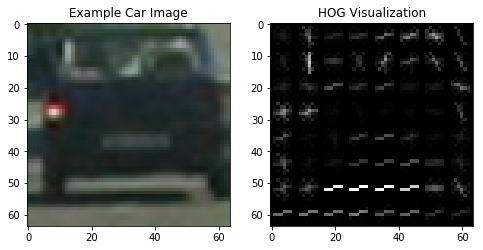

In [26]:
# Section 20
from skimage.feature import hog
        
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features

# Generate a random index to look at a car image
random_car_index = np.random.choice(20)

# Read in the image
image = plt.imread(vehicle_filenames[random_car_index])

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)


# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')